In [5]:
!pip install folium selenium pillow


In [6]:
!pip install webdriver-manager


In [7]:
!pip install selenium

<ipython-input-30-394fc2badc36>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tweets_df = pd.read_csv('tweets.csv', sep='_|_')
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Tweet: "1,""I see a lot of trash in the ocean near Miami Beach."" 
Sentimento: [{'label': 'NEGATIVE', 'score': 0.9989315867424011}]
Informações: [('1,""I', 'WORK_OF_ART'), ('Miami Beach', 'GPE')]
Tweet: "2,""Oil spill reported near Santa Monica."" 
Sentimento: [{'label': 'NEGATIVE', 'score': 0.9943694472312927}]
Informações: [('2,""Oil', 'CARDINAL'), ('Santa Monica', 'GPE')]
Tweet: "3,""Plastic debris found in the waters off the coast of Hawaii."" 
Sentimento: [{'label': 'NEGATIVE', 'score': 0.9953171014785767}]
Informações: [('Hawaii', 'GPE')]
Tweet: "4,""Chemical pollution detected in the Baltic Sea."" 
Sentimento: [{'label': 'NEGATIVE', 'score': 0.9833383560180664}]
Informações: [('the Baltic Sea', 'LOC')]
Tweet: "5,""Summer 2023 saw skylines choked by wildfire smoke, coral cooked in hot oceans and a full month of 110-degree F temperatures in Phoenix.📈⚠️♨️"
Sentimento: [{'label': 'NEGATIVE', 'score': 0.9137898087501526}]
Informações: [('5,""Summer 2023', 'DATE'), ('a full month', 'D

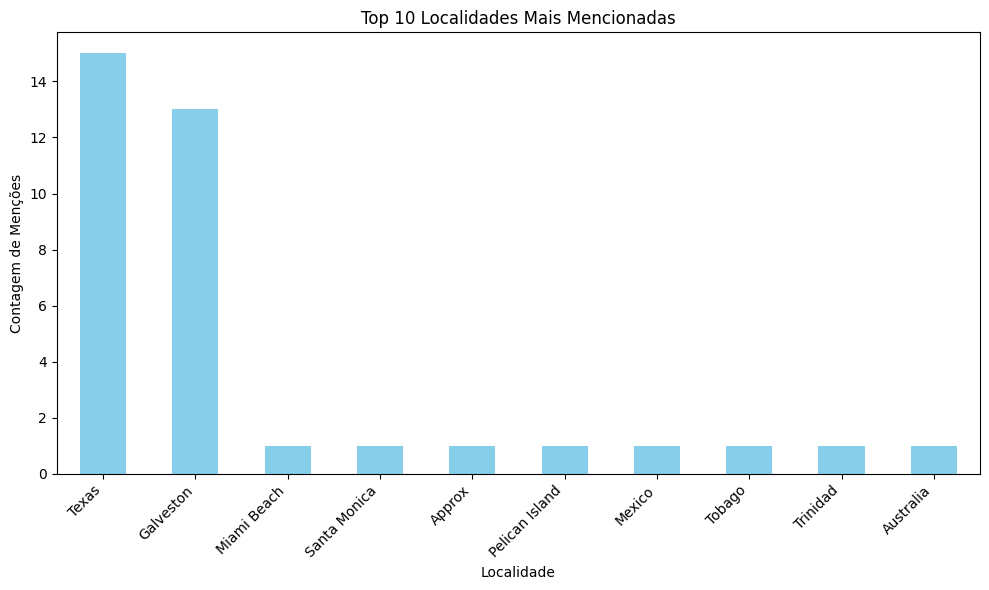

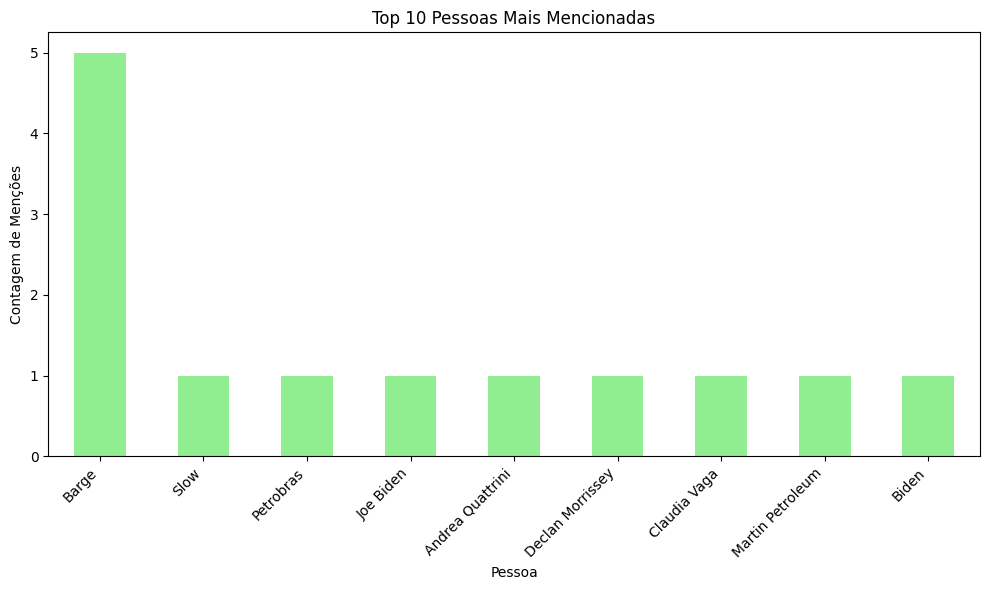

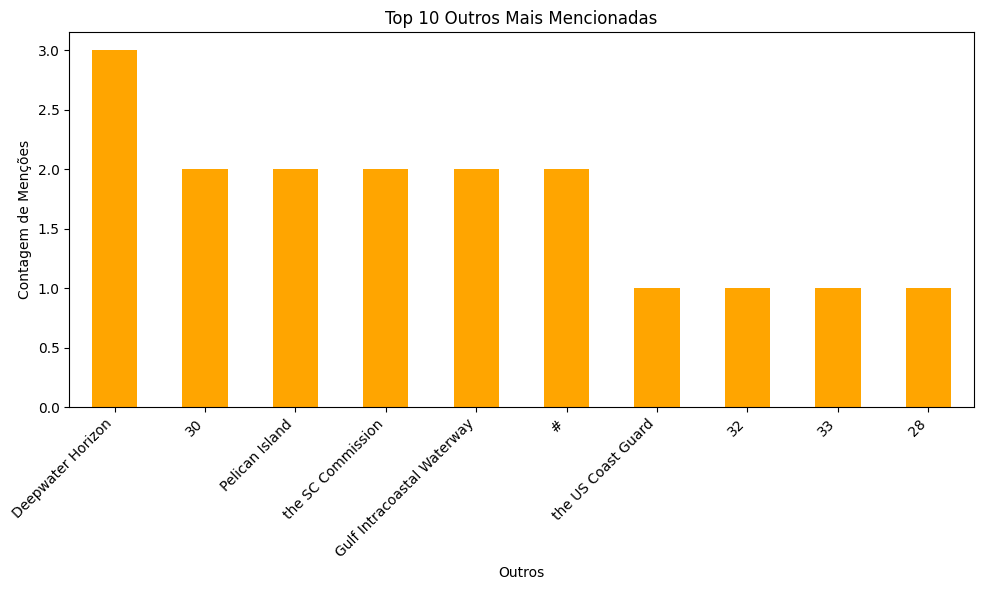

In [30]:
import pandas as pd
from transformers import pipeline
import spacy
import matplotlib.pyplot as plt

# Carregar a base de dados
tweets_df = pd.read_csv('tweets.csv', sep='_|_')


# Inicializar modelos
sentiment_pipeline = pipeline('sentiment-analysis')
nlp = spacy.load('en_core_web_sm')

def analisar_sentimento(texto):
    if texto:  # Verificar se o texto não é None
        resultado = sentiment_pipeline(texto)
        return resultado
    return None

def extrair_informacoes(texto):
    if texto:  # Verificar se o texto não é None
        doc = nlp(texto)
        entidades = [(ent.text, ent.label_) for ent in doc.ents]
        return entidades
    return []

# Função para extrair localidades, pessoas envolvidas e outros detalhes importantes nos tweets
def extrair_informacoes_importantes(texto):
    doc = nlp(texto)
    localidades = [ent.text for ent in doc.ents if ent.label_ == 'GPE' ]
    pessoas = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    outros_detalhes = [ent.text for ent in doc.ents if ent.label_ not in ['GPE', 'PERSON']]
    return localidades, pessoas, outros_detalhes

# Extrair localidades, pessoas envolvidas e outros detalhes importantes de todos os tweets
todas_localidades, todas_pessoas, todos_outros_detalhes = zip(*tweets_df['id'].apply(extrair_informacoes_importantes))

# Contar o número de vezes que cada localidade foi mencionada
contagem_localidades = pd.Series([item for sublist in todas_localidades for item in sublist]).value_counts()

# Contar o número de vezes que cada pessoa foi mencionada
contagem_pessoas = pd.Series([item for sublist in todas_pessoas for item in sublist]).value_counts()

contagem_outros = pd.Series([item for sublist in todos_outros_detalhes for item in sublist]).value_counts()

# Filtrar as 10 localidades mais mencionadas
top_10_localidades = contagem_localidades.head(10)

# Filtrar as 10 pessoas mais mencionadas
top_10_pessoas = contagem_pessoas.head(10)

top_10_outros = contagem_outros.head(10)

# Analisar cada tweet na base de dados
for index, row in tweets_df.iterrows():
    texto = row['id']
    sentimento = analisar_sentimento(texto)
    informacoes = extrair_informacoes(texto)

    if texto:  # Verificar se o texto não é None
        print(f"Tweet: {texto}")
        print(f"Sentimento: {sentimento}")
        print(f"Informações: {informacoes}")

# Verificar se há pessoas envolvidas ou outros detalhes importantes
if top_10_pessoas.empty and todos_outros_detalhes:
    print("Ação rápida e eficaz necessária! Detalhes importantes identificados nos tweets:")
    for detalhe in todos_outros_detalhes:
        print("- ", detalhe)
elif top_10_pessoas.empty:
    print("Nenhuma pessoa envolvida identificada nos tweets.")
elif todos_outros_detalhes:
    print("Ação rápida e eficaz necessária! Pessoas envolvidas e detalhes importantes identificados nos tweets:")
    print("Pessoas envolvidas:")
    for pessoa, contagem in top_10_pessoas.items():
        print("- ", pessoa, ":", contagem, "menções")
    print("\nDetalhes importantes:")
    for detalhe in todos_outros_detalhes:
        print("- ", detalhe)
else:
    print("Ação rápida e eficaz necessária! Pessoas envolvidas identificadas nos tweets:")
    for pessoa, contagem in top_10_pessoas.items():
        print("- ", pessoa, ":", contagem, "menções")

# Criar o gráfico de barras para localidades
plt.figure(figsize=(10, 6))
top_10_localidades.plot(kind='bar', color='skyblue')
plt.title('Top 10 Localidades Mais Mencionadas')
plt.xlabel('Localidade')
plt.ylabel('Contagem de Menções')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Criar o gráfico de barras para pessoas
plt.figure(figsize=(10, 6))
top_10_pessoas.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Pessoas Mais Mencionadas')
plt.xlabel('Pessoa')
plt.ylabel('Contagem de Menções')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Criar o gráfico de barras para pessoas
plt.figure(figsize=(10, 6))
top_10_outros.plot(kind='bar', color='orange')
plt.title('Top 10 Outros Mais Mencionadas')
plt.xlabel('Outros')
plt.ylabel('Contagem de Menções')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
